In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
path = "./Dataset/Supermarket Dataset - 1.csv"

In [3]:
import chardet
with open(path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [4]:
data = pd.read_csv(path, encoding=None).set_index('index')
data.head()

,category,sub_category,brand,sale_price,market_price
index,,,,,
1,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0
2,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0
3,Cleaning & Household,Pooja Needs,Trm,119.0,250.0
4,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0
5,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 1 to 8000
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      8000 non-null   object 
 1   sub_category  8000 non-null   object 
 2   brand         8000 non-null   object 
 3   sale_price    8000 non-null   float64
 4   market_price  8000 non-null   float64
dtypes: float64(2), object(3)
memory usage: 375.0+ KB


In [6]:
data.describe()

,sale_price,market_price
count,8000.000000,8000.000000
mean,319.226503,376.669700
std,481.221556,571.627408
min,5.000000,5.000000
25%,93.500000,100.000000
50%,190.000000,220.000000
75%,353.000000,420.000000
max,7299.000000,10695.000000


In [7]:
data.isnull().count()

category        8000
sub_category    8000
brand           8000
sale_price      8000
market_price    8000
dtype: int64

In [8]:
data['category'].unique()

array(['Beauty & Hygiene', 'Kitchen, Garden & Pets',
       'Cleaning & Household', 'Gourmet & World Food',
       'Foodgrains, Oil & Masala', 'Snacks & Branded Foods', 'Beverages',
       'Bakery, Cakes & Dairy', 'Baby Care', 'Fruits & Vegetables',
       'Eggs, Meat & Fish'], dtype=object)

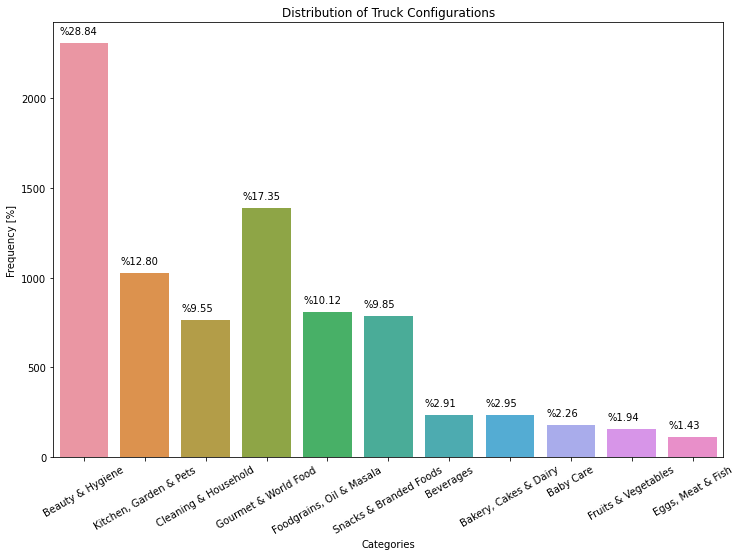

In [9]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="category", data=data)
ax.set_xticklabels(data['category'].unique())
plt.title('Distribution of Truck Configurations')
plt.xlabel('Categories')
plt.ylabel('Frequency [%]')
plt.xticks(rotation=30)
for p in ax.patches:
        ax.annotate('%{:.2f}'.format(p.get_height()/8000*100), (p.get_x(), p.get_height()+50))

In [10]:
data['profit'] = data['market_price'] - data['sale_price']
data.head()

,category,sub_category,brand,sale_price,market_price,profit
index,,,,,,
1,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,0.0
2,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,0.0
3,Cleaning & Household,Pooja Needs,Trm,119.0,250.0,131.0
4,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,27.0
5,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,0.0


In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
label_encoder = LabelEncoder()

data['Label_category']= label_encoder.fit_transform(data['category'])
data['Label_category'].unique()

array([ 2,  9,  4,  8,  6, 10,  3,  1,  0,  7,  5])

In [13]:
data.head()

,category,sub_category,brand,sale_price,market_price,profit,Label_category
index,,,,,,,
1,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,0.0,2
2,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,0.0,9
3,Cleaning & Household,Pooja Needs,Trm,119.0,250.0,131.0,4
4,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,27.0,4
5,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,0.0,2


In [14]:
category_profit = []
col = ['market_price','sale_price','profit']

In [15]:
res = {
    'category': [],
    'mp' : [],
    'sp' : [],
    'profit' : []
}

In [16]:
for i in range(len(label_encoder.classes_)):
    mp = data.loc[data['Label_category'] == i, 'market_price'].sum()
    sp = data.loc[data['Label_category'] == i, 'sale_price'].sum()
    pf = data.loc[data['Label_category'] == i, 'profit'].sum()
    res['category'].append(label_encoder.classes_[i])
    res['mp'].append(mp)
    res['sp'].append(sp)
    res['profit'].append(pf)

# Display result


In [17]:
new = pd.DataFrame.from_dict(res)
new.head()

,category,mp,sp,profit
0,Baby Care,115318.00,102744.11,12573.89
1,"Bakery, Cakes & Dairy",33330.00,30097.23,3232.77
2,Beauty & Hygiene,1086497.13,931273.44,155223.69
3,Beverages,61733.00,51521.59,10211.41
4,Cleaning & Household,192994.10,165168.31,27825.79


In [18]:
new['profit%'] = new['profit'] * 100 / new['mp']
new

,category,mp,sp,profit,profit%
0,Baby Care,115318.00,102744.11,12573.89,10.903666
1,"Bakery, Cakes & Dairy",33330.00,30097.23,3232.77,9.699280
2,Beauty & Hygiene,1086497.13,931273.44,155223.69,14.286618
3,Beverages,61733.00,51521.59,10211.41,16.541250
4,Cleaning & Household,192994.10,165168.31,27825.79,14.417949
5,"Eggs, Meat & Fish",39865.34,35473.71,4391.63,11.016161
6,"Foodgrains, Oil & Masala",169964.00,144039.59,25924.41,15.252883
7,Fruits & Vegetables,10440.76,8253.12,2187.64,20.952881
8,Gourmet & World Food,529855.77,471453.17,58402.60,11.022358
9,"Kitchen, Garden & Pets",661687.00,509643.58,152043.42,22.978148


In [19]:
new.corr()

,mp,sp,profit,profit%
mp,1.000000,0.998018,0.949216,0.229726
sp,0.998018,1.000000,0.927538,0.186550
profit,0.949216,0.927538,1.000000,0.431675
profit%,0.229726,0.186550,0.431675,1.000000


<AxesSubplot:>

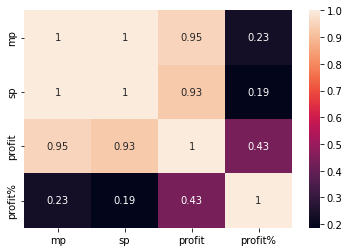

In [20]:
sns.heatmap(new.corr(), annot=True)

In [21]:
data['profit%'] =  data['profit'] * 100 / data['market_price']

new1 = data.loc[data['profit%'] > 0.5]
new1

,category,sub_category,brand,sale_price,market_price,profit,Label_category,profit%
index,,,,,,,,
3,Cleaning & Household,Pooja Needs,Trm,119.00,250.0,131.00,4,52.400000
4,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,27.00,4,15.340909
6,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.00,199.0,30.00,4,15.075377
11,Gourmet & World Food,Cooking & Baking Needs,NUTRASHIL,261.00,290.0,29.00,8,10.000000
16,Cleaning & Household,Bins & Bathroom Ware,Nakoda,49.00,59.0,10.00,4,16.949153
...,...,...,...,...,...,...,...,...
7990,Gourmet & World Food,Drinks & Beverages,Sprig Tea,141.55,149.0,7.45,8,5.000000
7992,Beauty & Hygiene,Men's Grooming,Park avenue,149.25,199.0,49.75,2,25.000000
7993,Cleaning & Household,All Purpose Cleaners,Mr Muscle,112.00,130.0,18.00,4,13.846154


<AxesSubplot:>

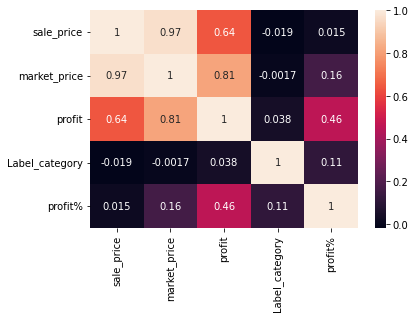

In [22]:
sns.heatmap(new1.corr(), annot=True)

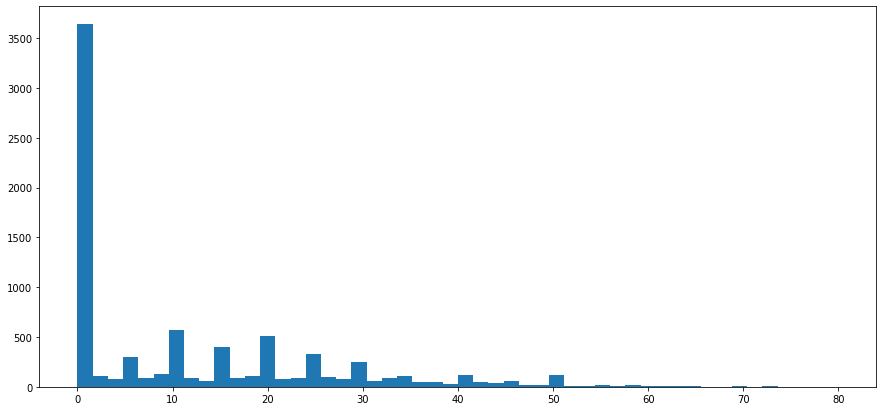

In [23]:
fig, ax = plt.subplots(figsize =(15, 7))
ax.hist(x=data['profit%'], bins = 50)
plt.show()

In [24]:
 def classify_sales(row):
    
    if row['profit%'] > 50.0:
        return "great sale"
    
    elif row['profit%'] <= 50.0 and row['profit%'] > 28.0:
        return "good sale"
    
    elif row['profit%'] < 28.0 and row['profit%'] >= 10.0:
        return "moderate sale"
    
    elif row['profit%'] < 10.0 and row['profit%'] > 1.0:
        return "poor sale"
    
    else:
        return "bad sale"
   


In [25]:
data["Sale Classification"] = data.apply(classify_sales, axis=1)
data

,category,sub_category,brand,sale_price,market_price,profit,Label_category,profit%,Sale Classification
index,,,,,,,,,
1,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,0.00,2,0.000000,bad sale
2,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,0.00,9,0.000000,bad sale
3,Cleaning & Household,Pooja Needs,Trm,119.00,250.0,131.00,4,52.400000,great sale
4,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,27.00,4,15.340909,moderate sale
5,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,0.00,2,0.000000,bad sale
...,...,...,...,...,...,...,...,...,...
7996,Beauty & Hygiene,Fragrances & Deos,Dkny,5550.00,5550.0,0.00,2,0.000000,bad sale
7997,Beverages,Fruit Juices & Drinks,Diabetics Dezire,305.00,305.0,0.00,3,0.000000,bad sale
7998,Beauty & Hygiene,Skin Care,Lotus Organics+,335.75,395.0,59.25,2,15.000000,moderate sale


In [26]:
data['Sale Classification'].value_counts()

bad sale         3623
moderate sale    2380
good sale        1060
poor sale         817
great sale        120
Name: Sale Classification, dtype: int64

<AxesSubplot:>

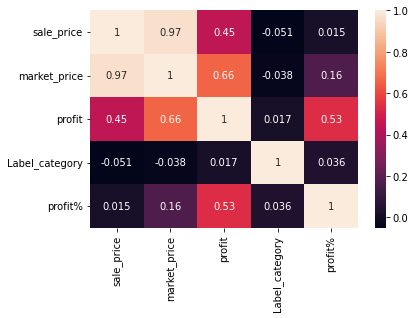

In [27]:
sns.heatmap(data.corr(), annot=True)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [29]:
label_encoder = LabelEncoder()

data['Sale Classification label']= label_encoder.fit_transform(data['Sale Classification'])

In [30]:
X_col =  data.columns[3:8]
y_col = data.columns[9]
X_col, y_col

(Index(['sale_price', 'market_price', 'profit', 'Label_category', 'profit%'], dtype='object'),
 'Sale Classification label')

In [31]:
X = data[X_col]
y = data[y_col]
X = X.drop('Label_category', axis=1)


In [32]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
X_sc

array([[-0.20621002, -0.27409374, -0.35595559, -0.80524628],
       [-0.28933701, -0.34407376, -0.35595559, -0.80524628],
       [-0.41610567, -0.22160872,  0.45580602,  2.80832388],
       ...,
       [ 0.03433872,  0.03206887,  0.01119613,  0.22917266],
       [ 1.04422776,  1.07302174,  0.68694119,  0.36709518],
       [-0.60106323, -0.60649886, -0.35595559, -0.80524628]])

In [33]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(6400, 4) (1600, 4)
(6400,) (1600,)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=42)

In [35]:
y_pred= clf.predict(X_test) 

In [36]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [37]:
cm

array([[741,   0,   0,   2,   0],
       [  0, 206,   0,   0,   0],
       [  0,   0,  21,   0,   0],
       [  0,   0,   0, 468,   0],
       [  0,   0,   0,   7, 155]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score,classification_report

In [39]:
accuracy_score(y_test, y_pred, normalize=False)

1591

In [40]:
clf.score(X_test,y_test)

0.994375

In [41]:
RF_classification_report = classification_report(y_test,y_pred,target_names=data['Sale Classification'].unique())
print("\t\t\t RF Classification Report")
print(RF_classification_report)

			 RF Classification Report
               precision    recall  f1-score   support

     bad sale       1.00      1.00      1.00       743
   great sale       1.00      1.00      1.00       206
moderate sale       1.00      1.00      1.00        21
    poor sale       0.98      1.00      0.99       468
    good sale       1.00      0.96      0.98       162

     accuracy                           0.99      1600
    macro avg       1.00      0.99      0.99      1600
 weighted avg       0.99      0.99      0.99      1600

